**NAMA: DIVA ANGGRAENI**

**NPM: 24083010065**

**ANALISIS NUMERIK (A)**

**PENUGASAN: Interpolasi**

**Selasa, 9 September 2025**

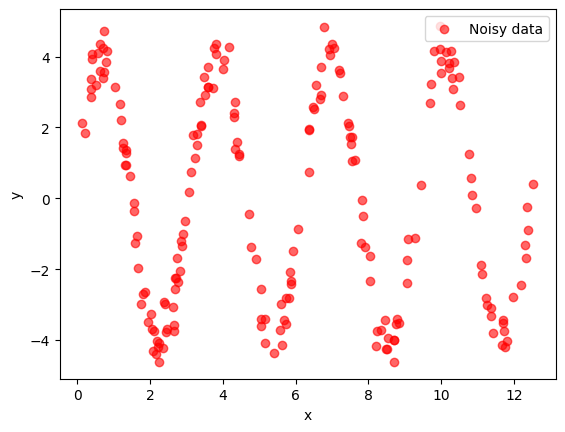

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 200
NPM= 65

# Generate random x values between 0 and 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

# Plot
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
# plt.plot(np.sort(x), 4*np.sin(4*np.sort(x) + 0.2), label="True function", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# TUGAS: temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)

**Tugas: temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)**

Polinomial Orde 9:
           9            8           7          6         5         4
4.567e-05 x - 0.002581 x + 0.06137 x - 0.7977 x + 6.163 x - 28.78 x
         3       2
 + 78.7 x - 115 x + 72.35 x - 10.33
RMSE = 2.229

Polinomial Orde 15:
            15             14             13             12          11
-8.112e-09 x  + 7.592e-07 x  - 3.174e-05 x  + 0.0007819 x  - 0.0126 x 
           10         9         8         7        6         5
 + 0.1395 x  - 1.085 x + 5.981 x - 23.26 x + 63.4 x - 120.2 x
          4         3         2
 + 157.6 x - 136.9 x + 64.19 x - 8.77 x + 2.24
RMSE = 0.148



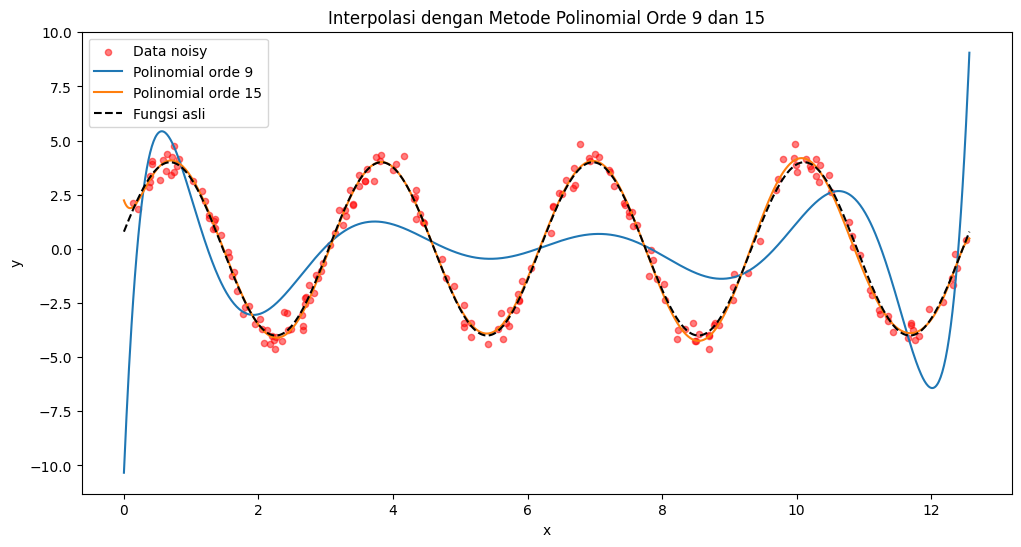

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(65)
x = np.random.uniform(0, 4*np.pi, 200)
y_true = 4 * np.sin(2*x + 0.2)
y_noisy = y_true + np.random.normal(0, 0.4, 200)

idx = np.argsort(x)
x_sort, y_sort = x[idx], y_noisy[idx]

xx = np.linspace(0, 4*np.pi, 1000)
y_true_grid = 4*np.sin(2*xx + 0.2)

plt.figure(figsize=(12,6))
plt.scatter(x, y_noisy, color="red", alpha=0.5, s=20, label="Data noisy")
for orde in [9, 15]:
    poly = np.poly1d(np.polyfit(x_sort, y_sort, orde))
    plt.plot(xx, poly(xx), label=f"Polinomial orde {orde}")
    rmse = np.sqrt(np.mean((poly(xx) - y_true_grid)**2))
    print(f"Polinomial Orde {orde}:")
    print(poly)
    print(f"RMSE = {rmse:.3f}\n")
plt.plot(xx, y_true_grid, '--', label="Fungsi asli", color="black")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Interpolasi dengan Metode Polinomial Orde 9 dan 15")
plt.legend()
plt.show()

**Metode Polinomial**

Metode interpolasi yang saya coba implementasikan adalah metode polinomial. Hal ini karena  polinomial merupakan salah satu teknik dasar yang umum digunakan untuk mendekati fungsi dari data titik-titik yang tersebar.
* **Polinomial orde 9:** kurva sudah mulai mengikuti pola sinusoidal, namun tidak sepenuhnya mempresentasikan bentuk fungsi asli. Hal ini juga dibuktikan dari nilai RMSE = 2.229 yang menandakan error masih tinggi.
* **Polinomial orde 15:** kurva semakin fleksibel dan dapat menyesuaikan data noisy dengan lebih baik. Hal ini juga dibuktikan dengan penurunan drastis pada nilai RMSE = 0.148 yang menandakan error relatif kecil.

Semakin tinggi orde polinomial, hasil kurva semakin fleksibel terhadap data sinusoidal. Namun, peningkatan orde juga meningkatkan risiko *overfitting* dan menimbulkan koefisien yang sulit diinterpretasikan, sehingga metode polinomial orde tinggi cenderung kurang stabil.

Hasil estimasi parameter:
Amplitudo (A)  = 4.070
Frekuensi (k)  = 2.006
Fase (phi)     = 0.169
Offset (c)     = -0.011
RMSE           = 0.076


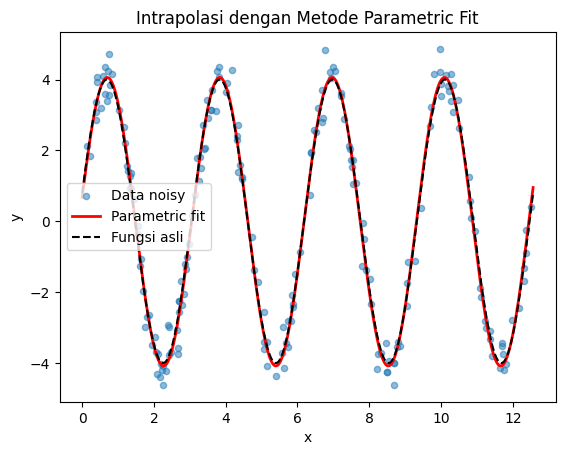

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

n = 200
NPM = 65
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

def sin_model(x, A, k, phi, c):
    return A * np.sin(k*x + phi) + c

# Fit dengan curve_fit
p0 = [3.5, 2.0, 0.1, 0.0]   # tebakan awal [amplitudo, frekuensi, fase, offset]
params, cov = curve_fit(sin_model, x, y_noisy, p0=p0)
A, k, phi, c = params

y_true_grid = 4*np.sin(2*x_grid + 0.2)
rmse = np.sqrt(np.mean((y_fit - y_true_grid)**2))

print("Hasil estimasi parameter:")
print(f"Amplitudo (A)  = {A:.3f}")
print(f"Frekuensi (k)  = {k:.3f}")
print(f"Fase (phi)     = {phi:.3f}")
print(f"Offset (c)     = {c:.3f}")
print(f"RMSE           = {rmse:.3f}")

x_grid = np.linspace(0, 4*np.pi, 1000)
y_fit = sin_model(x_grid, *params)

plt.scatter(x, y_noisy, s=20, alpha=0.5, label="Data noisy")
plt.plot(x_grid, y_fit, 'r', linewidth=2, label="Parametric fit")
plt.plot(x_grid, 4*np.sin(2*x_grid + 0.2), '--', label="Fungsi asli", color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Intrapolasi dengan Metode Parametric Fit")
plt.legend()
plt.show()

**Metode Parametric Sinus Fit**

Metode lain yang saya gunakan adalah parametric sinus fit. Alasannya karena bentuk fungsi asli yang ingin direkontruksi memang berupa sinusoidal, sehingga metode ini lebih sesuai. Prinsipnya adalah mencari parameter amplitudo, frekuensi, fase, dan offset.

Fungsi asli -> 4 sin(2x + 0.2)
* Amplitudo (A) = 4.070 -> nilai amplitudo sangat mendekati dengan nilai asli (4), sehingga tinggi gelombang berhasil direkontruksi dengan baik.
* Frekuensi (k) = 2.006 -> nilai frekuensi hampir sama dengan nilai asli (2), sehingga jumlah osilasi gelombang sesuai dengan sinyal sebenarnya.
* Fase (phi) = 0.169 -> nilai fase mendekati nilai asli (0.2), sehingga posisi puncak dan lembah kurva tepat.
* Offset (c) = -0.011 -> nilai offset sangat kecil (≈0), sehingga kurva hampir tidak bergeser secara vertikal.
* RMSE = 0.076 -> nilai error sangat kecil, menunjukkan bahwa kurva hasil fitting hampir menempel pada fungsi sinus asli.

Metode parametric sinus fit ini modelnya sederhana namun terbukti akurat, serta parameter yang diperoleh memiliki makna yang jelas. Namun, metode ini hanya efektif jika bentuk dasar sinyal sudah diketahui sebelumnya (seperti berupa sinusoidal).

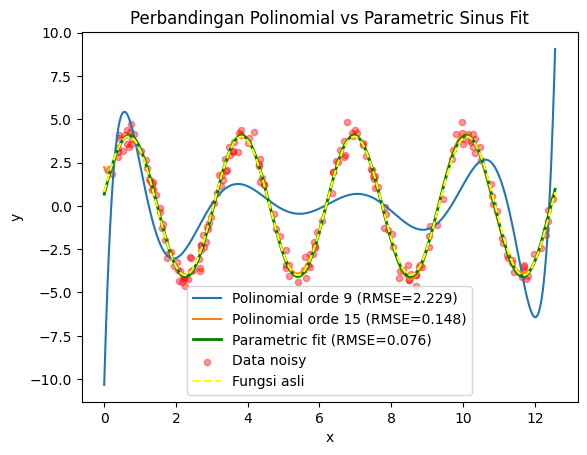

In [47]:
# Perbandingan metode polinomial dan parametric sinus fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

np.random.seed(65)
x = np.random.uniform(0, 4*np.pi, 200)
y_true = 4 * np.sin(2*x + 0.2)
y_noisy = y_true + np.random.normal(0, 0.4, 200)
xx = np.linspace(0, 4*np.pi, 1000)
y_true_grid = 4*np.sin(2*xx + 0.2)

# Polinomial orde 9 & 15
rmses = {}
for orde in [9, 15]:
    poly = np.poly1d(np.polyfit(x, y_noisy, orde))
    y_poly = poly(xx)
    rmses[f"Poly {orde}"] = np.sqrt(np.mean((y_poly - y_true_grid)**2))
    plt.plot(xx, y_poly, label=f"Polinomial orde {orde} (RMSE={rmses[f'Poly {orde}']:.3f})")

# Parametric sinus fit
def sin_model(x, A, k, phi, c): return A*np.sin(k*x + phi) + c
params, _ = curve_fit(sin_model, x, y_noisy, p0=[3.5, 2.0, 0.1, 0.0])
y_fit = sin_model(xx, *params)
rmse_fit = np.sqrt(np.mean((y_fit - y_true_grid)**2))
plt.plot(xx, y_fit, 'g', lw=2, label=f"Parametric fit (RMSE={rmse_fit:.3f})")

plt.scatter(x, y_noisy, color="red", alpha=0.4, s=20, label="Data noisy")
plt.plot(xx, y_true_grid, '--', color="yellow", label="Fungsi asli")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Perbandingan Polinomial vs Parametric Sinus Fit")
plt.legend()
plt.show()


**KESIMPULAN**

Metode polinomial dan parametric sinus fit terbukti mampu merekontruksi sinyal dari data noisy, namun hasil dan stabilitasnya berbeda.
* Polinomial orde 9: hasil kurva mulai mengikuti pola sinusoidal, namun error masih tinggi (RMSE = 2.229).
* Polinomial orde 15: hasil kurva lebih fleksibel dan error relatif kecil (RMSE = 0.148), namun semakin tinggi ordenya meningkatkan risiko *overfitting* serta koefisien sulit diinterpretasikan.
* Parametric sinus fit: hasil parameter amplitudo, frekuensi, fase, dan offset sangat mendekati nilai asli. Hasil kurva juga hampir menempel dengan fungsi asli dan error sangat kecil (RMSE = 0.076).

Dengan begitu, dapat disimpulkan bahwa **metode parametric sinus fit lebih akurat dan stabil** untuk merekontruksi sinyal sinusoidal dibandingkan metode polinomial, terutama pada data noisy.
